# D4RL datasets
For each environment, compare across tasks
* Return distributions
* Observation distributions
* Action distributions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import d4rl
import gym

from src.utils.data import parse_stacked_trajectories

seed = 0

objc[67384]: Class GLFWApplicationDelegate is implemented in both /Users/hfml/.mujoco/mujoco210/bin/libglfw.3.dylib (0x11290e778) and /Users/hfml/opt/miniconda3/envs/irl/lib/python3.9/site-packages/glfw/libglfw.3.dylib (0x112a0d7e8). One of the two will be used. Which one is undefined.
objc[67384]: Class GLFWWindowDelegate is implemented in both /Users/hfml/.mujoco/mujoco210/bin/libglfw.3.dylib (0x11290e700) and /Users/hfml/opt/miniconda3/envs/irl/lib/python3.9/site-packages/glfw/libglfw.3.dylib (0x112a0d810). One of the two will be used. Which one is undefined.
objc[67384]: Class GLFWContentView is implemented in both /Users/hfml/.mujoco/mujoco210/bin/libglfw.3.dylib (0x11290e7a0) and /Users/hfml/opt/miniconda3/envs/irl/lib/python3.9/site-packages/glfw/libglfw.3.dylib (0x112a0d860). One of the two will be used. Which one is undefined.
objc[67384]: Class GLFWWindow is implemented in both /Users/hfml/.mujoco/mujoco210/bin/libglfw.3.dylib (0x11290e818) and /Users/hfml/opt/miniconda3/envs

In [82]:
halfcheetah_obs_names = [
    "rootz", "rooty", "bthigh", "bshin", "bfoot", "fthigh", "fshin", "ffoot", 
    "rootx", "rootz", "rooty", "bthigh", "bshin", "bfoot", "fthigh", "fshin", "ffoot"
]
hopper_obs_names = [
    "top-z", "top-angle", "thigh-angle", "leg-angle",
    "foot-angle", "top-x-v", "top-z-v", "top-angle-v",
    "thigh-angle-v", "leg-angle-v", "foot-angle-v"
]
walker2d_obs_names = [
    "rootz", "rooty", "thigh_joint", "let_joint", "foot_joint", 
    "thigh_left_joint", "leg_left_joint", "foot_left_joint",
    "rootx", "rootz", "rooty", "tight_joint", "leg_joint", "foot_joint",
    "thigh_left_joint", "leg_left_joint", "foot_left_joint",
]

In [17]:
def get_returns(dataset):
    return [np.sum(traj["rwd"]) for traj in dataset]

def subsample_observations(dataset, num_samples=10000):
    obs = np.vstack([traj["obs"] for traj in dataset])
    idx = np.arange(len(obs))
    np.random.shuffle(idx)
    return obs[idx[:num_samples]].copy()

def plot_distributions(obs_list, return_list, legends, titles, ax, alpha=0.6):
    obs_dim = obs_list[0].shape[1]
    for i in range(obs_dim):
        for j in range(len(obs_list)): # iterate over datasets
            ax[i].hist(obs_list[j][:, i], bins="fd", alpha=alpha, label=legends[j])
        ax[i].set_title(titles[i])
    
    for j in range(len(return_list)):
        ax[i+1].hist(return_list[j], bins="fd", alpha=alpha, label=legends[j])
    ax[i+1].set_title("returns")

    ax[0].legend()

In [68]:
# load hopper data
max_eps = 1000
hopper_expert = parse_stacked_trajectories(
    gym.make("hopper-expert-v2").get_dataset(), max_eps, skip_terminated=False
)
hopper_medium_expert = parse_stacked_trajectories(
    gym.make("hopper-medium-expert-v2").get_dataset(), max_eps, skip_terminated=False
)
hopper_medium_replay = parse_stacked_trajectories(
    gym.make("hopper-medium-replay-v2").get_dataset(), max_eps, skip_terminated=False
)
hopper_medium = parse_stacked_trajectories(
    gym.make("hopper-medium-v2").get_dataset(), max_eps, skip_terminated=False
)

load datafile: 100%|██████████| 21/21 [00:03<00:00,  6.75it/s]


In [69]:
hopper_expert_obs = subsample_observations(hopper_expert)
hopper_medium_expert_obs = subsample_observations(hopper_medium_expert)
hopper_medium_replay_obs = subsample_observations(hopper_medium_replay)
hopper_medium_obs = subsample_observations(hopper_medium)

hopper_expert_returns = get_returns(hopper_expert)
hopper_medium_expert_returns = get_returns(hopper_medium_expert)
hopper_medium_replay_returns = get_returns(hopper_medium_replay)
hopper_medium_returns = get_returns(hopper_medium)

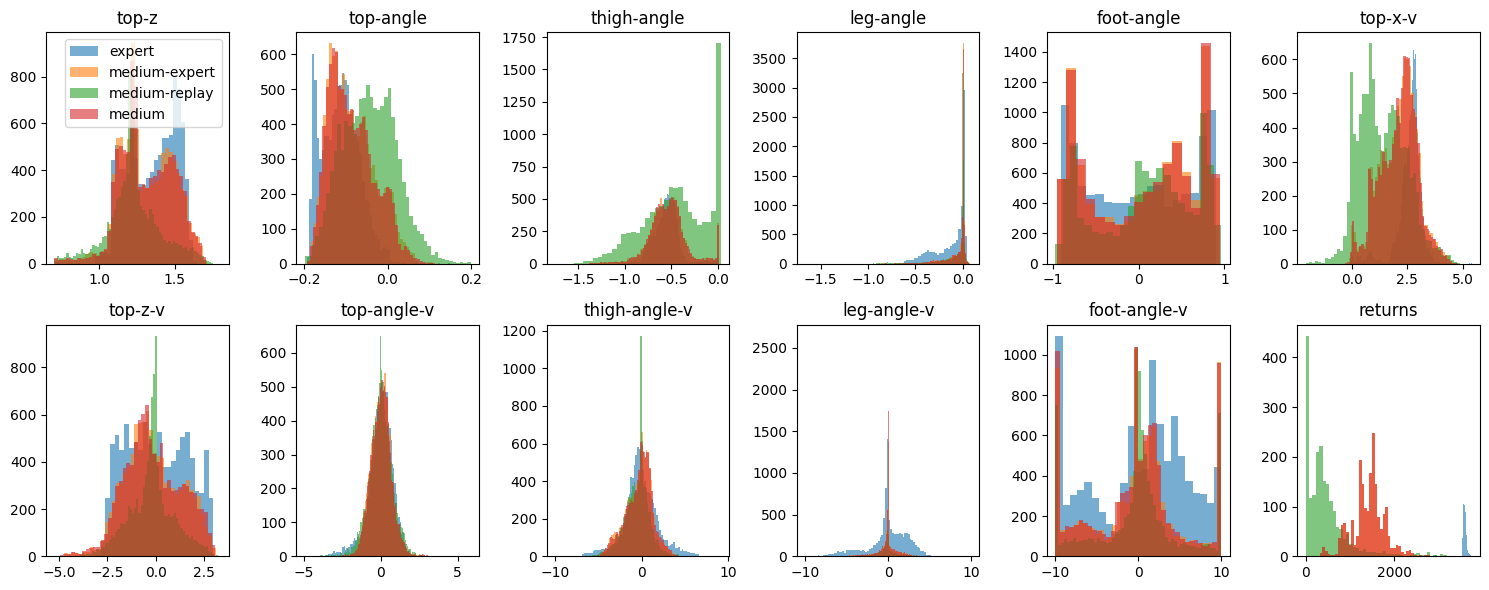

In [70]:
num_cols = 6
num_rows = (hopper_expert_obs.shape[1] + 1) // num_cols
fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 6))
plot_distributions(
    [
        hopper_expert_obs, 
        hopper_medium_expert_obs,
        hopper_medium_replay_obs,
        hopper_medium_obs
    ],
    [
        hopper_expert_returns, 
        hopper_medium_expert_returns,
        hopper_medium_replay_returns,
        hopper_medium_returns
    ],
    [
        "expert",
        "medium-expert",
        "medium-replay",
        "medium"
    ],
    hopper_obs_names,
    ax.flat
)
plt.tight_layout()
plt.show()

In [74]:
# load halfcheetah data
max_eps = 1000
halfcheetah_expert = parse_stacked_trajectories(
    gym.make("halfcheetah-expert-v2").get_dataset(), max_eps, skip_terminated=False
)
halfcheetah_medium_expert = parse_stacked_trajectories(
    gym.make("halfcheetah-medium-expert-v2").get_dataset(), max_eps, skip_terminated=False
)
halfcheetah_medium_replay = parse_stacked_trajectories(
    gym.make("halfcheetah-medium-replay-v2").get_dataset(), max_eps, skip_terminated=False
)
halfcheetah_medium = parse_stacked_trajectories(
    gym.make("halfcheetah-medium-v2").get_dataset(), max_eps, skip_terminated=False
)

/Users/hfml/opt/miniconda3/envs/irl/lib/python3.9/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|██████████| 21/21 [00:04<00:00,  4.39it/s]


In [75]:
halfcheetah_expert_obs = subsample_observations(halfcheetah_expert)
halfcheetah_medium_expert_obs = subsample_observations(halfcheetah_medium_expert)
halfcheetah_medium_replay_obs = subsample_observations(halfcheetah_medium_replay)
halfcheetah_medium_obs = subsample_observations(halfcheetah_medium)

halfcheetah_expert_returns = get_returns(halfcheetah_expert)
halfcheetah_medium_expert_returns = get_returns(halfcheetah_medium_expert)
halfcheetah_medium_replay_returns = get_returns(halfcheetah_medium_replay)
halfcheetah_medium_returns = get_returns(halfcheetah_medium)

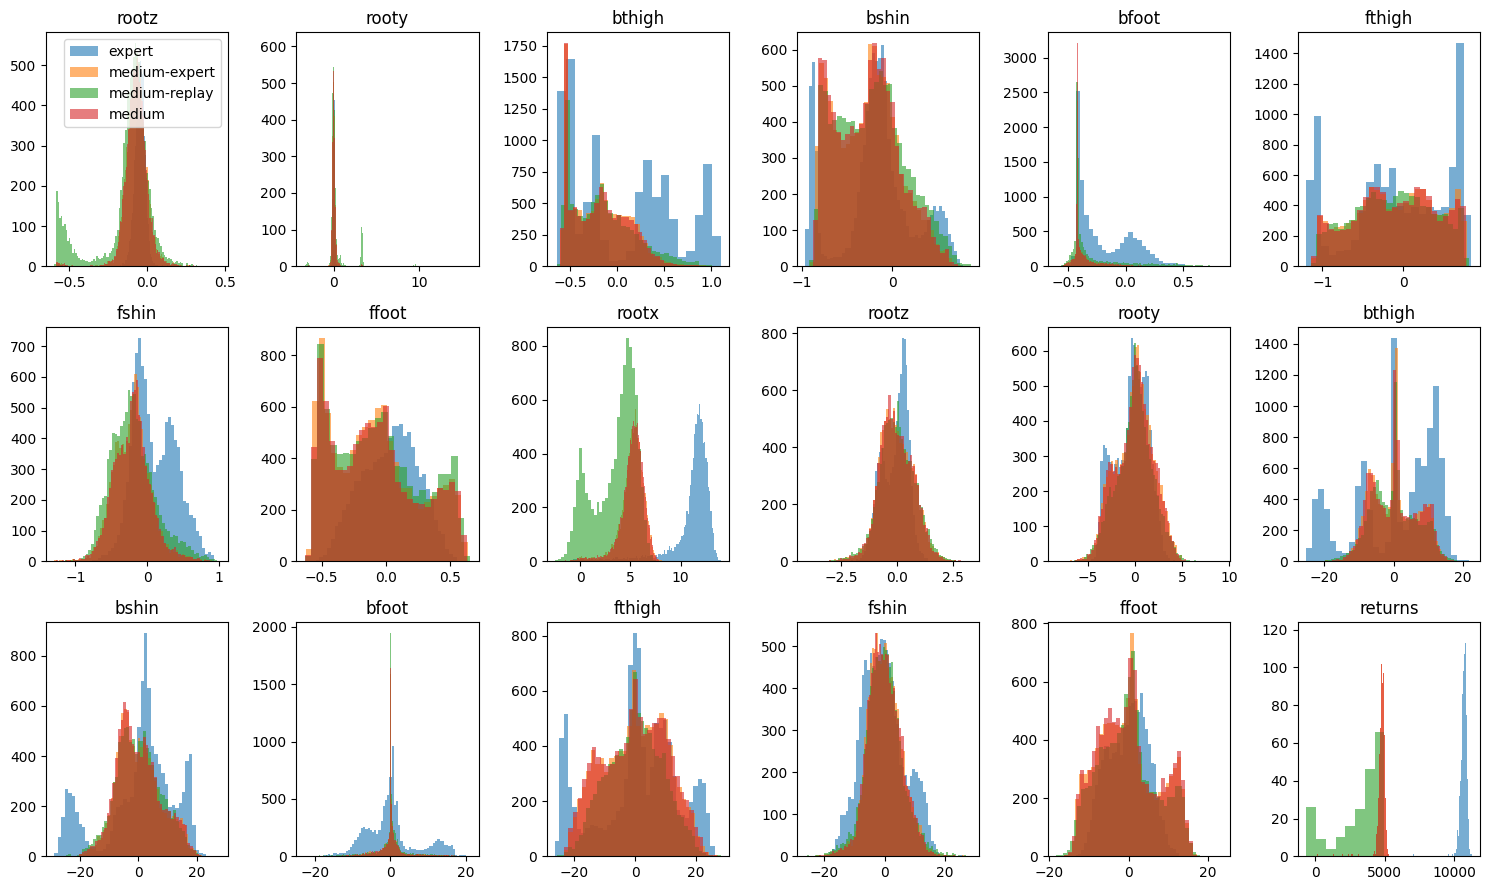

In [78]:
num_cols = 6
num_rows = (halfcheetah_expert_obs.shape[1] + 1) // num_cols
fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 9))
plot_distributions(
    [
        halfcheetah_expert_obs, 
        halfcheetah_medium_expert_obs,
        halfcheetah_medium_replay_obs,
        halfcheetah_medium_obs
    ],
    [
        halfcheetah_expert_returns, 
        halfcheetah_medium_expert_returns,
        halfcheetah_medium_replay_returns,
        halfcheetah_medium_returns
    ],
    [
        "expert",
        "medium-expert",
        "medium-replay",
        "medium"
    ],
    halfcheetah_obs_names,
    ax.flat
)
plt.tight_layout()
plt.show()

In [79]:
# load walker2d data
max_eps = 1000
walker2d_expert = parse_stacked_trajectories(
    gym.make("walker2d-expert-v2").get_dataset(), max_eps, skip_terminated=False
)
walker2d_medium_expert = parse_stacked_trajectories(
    gym.make("walker2d-medium-expert-v2").get_dataset(), max_eps, skip_terminated=False
)
walker2d_medium_replay = parse_stacked_trajectories(
    gym.make("walker2d-medium-replay-v2").get_dataset(), max_eps, skip_terminated=False
)
walker2d_medium = parse_stacked_trajectories(
    gym.make("walker2d-medium-v2").get_dataset(), max_eps, skip_terminated=False
)

load datafile: 100%|██████████| 21/21 [00:04<00:00,  4.47it/s]


In [80]:
walker2d_expert_obs = subsample_observations(walker2d_expert)
walker2d_medium_expert_obs = subsample_observations(walker2d_medium_expert)
walker2d_medium_replay_obs = subsample_observations(walker2d_medium_replay)
walker2d_medium_obs = subsample_observations(walker2d_medium)

walker2d_expert_returns = get_returns(walker2d_expert)
walker2d_medium_expert_returns = get_returns(walker2d_medium_expert)
walker2d_medium_replay_returns = get_returns(walker2d_medium_replay)
walker2d_medium_returns = get_returns(walker2d_medium)

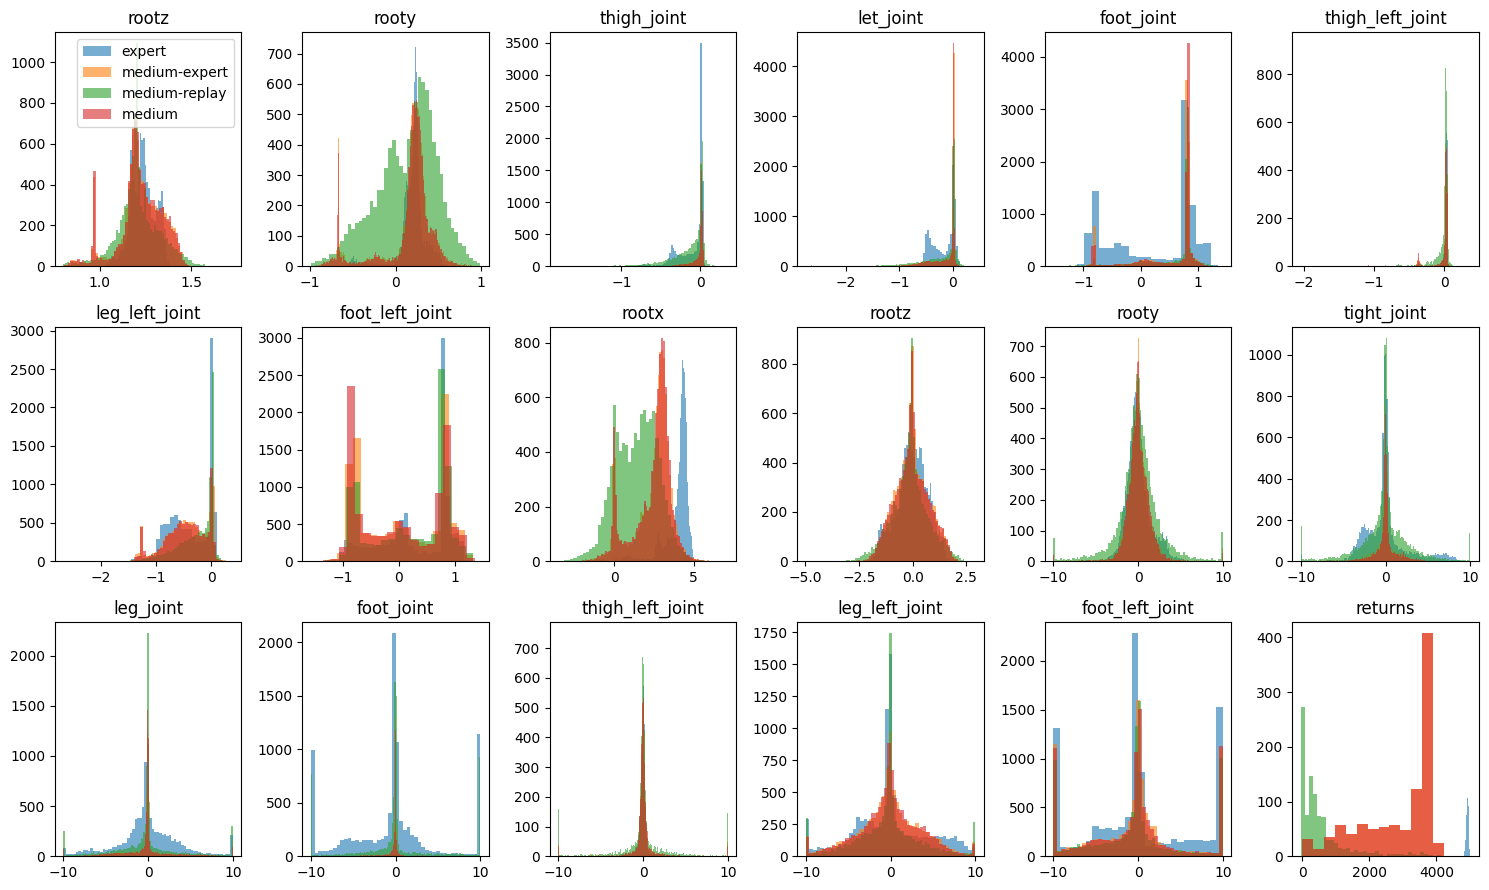

In [83]:
num_cols = 6
num_rows = (walker2d_expert_obs.shape[1] + 1) // num_cols
fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 9))
plot_distributions(
    [
        walker2d_expert_obs, 
        walker2d_medium_expert_obs,
        walker2d_medium_replay_obs,
        walker2d_medium_obs
    ],
    [
        walker2d_expert_returns, 
        walker2d_medium_expert_returns,
        walker2d_medium_replay_returns,
        walker2d_medium_returns
    ],
    [
        "expert",
        "medium-expert",
        "medium-replay",
        "medium"
    ],
    walker2d_obs_names,
    ax.flat
)
plt.tight_layout()
plt.show()